<a href="https://colab.research.google.com/github/ektamistry/WhatsApp-Chat-EDA-Sentiment-Analysis/blob/main/WhatsApp_Chat_EDA_%26_Sentiment_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 4.8 MB/s eta 0:00:00


In [ ]:
!pip install tldextract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 1.1 MB/s eta 0:00:00


In [ ]:
!pip install urlextract

In [ ]:
import re
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from urlextract import URLExtract
from wordcloud import WordCloud
import io
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
import spacy
import string
import pytz

### **Accessing a Text File in Read Mode**

In [ ]:
file = open("/content/_chat.txt" , 'r', encoding='utf-8')
data = file.read()

# **PreProcessing**

### **Dividing the Data into Dates and Messages**

In [ ]:
#spliting the data into dates and messages
pattern= '\[[^\]]*\]'

messages = re.split(pattern , data)
dates = re.findall(pattern  ,data)

print("Number of Messages :",len(messages))
print("Number of Dates :",len(dates))


Number of Messages : 117807
Number of Dates : 117806


In [ ]:
print("List of Messages :", messages[0:10])

List of Messages : ['', ' Shounak Deshmukh: HAPPY NEW YEAR BOIS 🙏🙏🙏\n', ' Harshad Shah NMIMS: HAPPY NEW YEAR\n', ' Brshank Negi NMIMS: _*Happy New Year 2021*_🥳👌🏼\n\u200e', ' Harshad Shah NMIMS: \u200esticker omitted\n', ' Aditya Acharya NMIMS: Chalo naya saal covid ke naam\n', ' Saransh Batnagar: Happy New year 🎉🎉\n', ' Shireen: Happy new year !!!!!!!!🥳\n\u200e', ' Brshank Negi NMIMS: \u200esticker omitted\n', ' Shreyas Dongre: Happy new year @everyone\n']


In [ ]:
print("List of Dates :", dates[0:10])

List of Dates : ['[01/01/21, 12:00:02 AM]', '[01/01/21, 12:00:03 AM]', '[01/01/21, 12:00:06 AM]', '[01/01/21, 12:00:12 AM]', '[01/01/21, 12:00:15 AM]', '[01/01/21, 12:00:15 AM]', '[01/01/21, 12:00:16 AM]', '[01/01/21, 12:00:17 AM]', '[01/01/21, 12:00:20 AM]', '[01/01/21, 12:00:23 AM]']


In [ ]:
# removing square brackets form the string date
date=[]
for i in range(0,len(dates)):
  x = dates[i][1:]
  x = x[:-1]
  date.append(x)

date[1]

'01/01/21, 12:00:03 AM'

In [ ]:
#Removing the Initial Empty String from the Message List
del messages[0]
for i in range (0,3):
  del messages[i]
  del date[i]

## **Cleaning Up Dates with Inaccurate Data**

### **Removing Inaccurate Entries from the Date Data**



In [ ]:
# now in dates there are some dirty data
# removing dirty data
dates_index = []
for i in date:
  if not(len(i)>=19 and len(i)<=21):
    x = date.index(i)
    dates_index.append(x)
    del date[x]
    del messages[x]

print(len(date))
print(len(messages))


117678
117678


In [ ]:
print(date)

['01/01/21, 12:00:03 AM', '01/01/21, 12:00:12 AM', '01/01/21, 12:00:15 AM', '01/01/21, 12:00:16 AM', '01/01/21, 12:00:17 AM', '01/01/21, 12:00:20 AM', '01/01/21, 12:00:23 AM', '01/01/21, 12:00:29 AM', '01/01/21, 12:00:37 AM', '01/01/21, 12:00:39 AM', '01/01/21, 12:00:42 AM', '01/01/21, 12:00:42 AM', '01/01/21, 12:00:46 AM', '01/01/21, 12:00:51 AM', '01/01/21, 12:00:51 AM', '01/01/21, 12:00:54 AM', '01/01/21, 12:01:01 AM', '01/01/21, 12:01:10 AM', '01/01/21, 12:01:17 AM', '01/01/21, 12:01:18 AM', '01/01/21, 12:01:19 AM', '01/01/21, 12:01:19 AM', '01/01/21, 12:01:37 AM', '01/01/21, 12:01:44 AM', '01/01/21, 12:01:52 AM', '01/01/21, 12:01:55 AM', '01/01/21, 12:01:55 AM', '01/01/21, 12:01:58 AM', '01/01/21, 12:02:03 AM', '01/01/21, 12:02:05 AM', '01/01/21, 12:02:16 AM', '01/01/21, 12:03:00 AM', '01/01/21, 12:03:06 AM', '01/01/21, 12:03:07 AM', '01/01/21, 12:03:15 AM', '01/01/21, 12:03:25 AM', '01/01/21, 12:03:36 AM', '01/01/21, 12:03:45 AM', '01/01/21, 12:03:45 AM', '01/01/21, 12:03:46 AM',

### **Transforming Lists of Messages and Dates into Datasets**

In [ ]:
df = pd.DataFrame({ 'date': date ,'user_message': messages})
# convert date type
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y, %H:%M:%S %p')
df.head()


,date,user_message
0,2021-01-01 12:00:03,Harshad Shah NMIMS: HAPPY NEW YEAR\n
1,2021-01-01 12:00:12,Harshad Shah NMIMS: ‎sticker omitted\n
2,2021-01-01 12:00:15,Saransh Batnagar: Happy New year 🎉🎉\n
3,2021-01-01 12:00:16,Shireen: Happy new year !!!!!!!!🥳\n‎
4,2021-01-01 12:00:17,Brshank Negi NMIMS: ‎sticker omitted\n


In [ ]:
users = []
messages = []
for message in df['user_message']:
  entry = re.split('([\w\W]+?):\s', message)
  if entry[1:]:  # user name
    users.append(entry[1])
    messages.append(" ".join(entry[2:]))
  else:
    users.append('group_notification')
    messages.append(entry[0])
print("Users :",users[0:10] )
print("Messages :",messages[0:10])


Users : [' Harshad Shah NMIMS', ' Harshad Shah NMIMS', ' Saransh Batnagar', ' Shireen', ' Brshank Negi NMIMS', ' Shreyas Dongre', ' Jay Malanker', ' Shounak Deshmukh', ' Aditya Acharya NMIMS', ' Brshank Negi NMIMS']
Messages : ['HAPPY NEW YEAR\n', '\u200esticker omitted\n', 'Happy New year 🎉🎉\n', 'Happy new year !!!!!!!!🥳\n\u200e', '\u200esticker omitted\n', 'Happy new year @everyone\n', 'Happy New Year 🕳️\n', '\u200eThis message was deleted.\n', 'Arre bhai 🤣\n', 'Ay gaali nahi\n']


In [ ]:
gettime = []
for i in date:
  y = i[-2:]
  gettime.append(y)



### **Deriving Additional Features from the Dataset**

In [ ]:
# making dataset more presice
df['user'] = users
df['message'] = messages
df['only_date'] = df['date'].dt.date
df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['second'] = df['date'].dt.second
df['am,pm'] = gettime

In [ ]:
print(df.iloc[75:85])

                  date                                       user_message  \
75 2021-01-01 12:06:38            Brshank Negi NMIMS: ‎sticker omitted\n‎   
76 2021-01-01 12:06:38             Brshank Negi NMIMS: ‎sticker omitted\n   
77 2021-01-01 12:06:41                Aditya Patankar: Happy new year🙏🏻\n   
78 2021-01-01 12:06:47             Devesh Pawar NMIMS: Happy New Year🍻🎉\n   
79 2021-01-01 12:06:51                                  Jay Malanker: 🥳\n   
80 2021-01-01 12:07:06    Saransh Batnagar: Kitna shor horaha hai bahar\n   
81 2021-01-01 12:07:25                        Jay Malanker: Acha hai na\n   
82 2021-01-01 12:07:29   Brshank Negi NMIMS: Iss time shor nahi hota h...   
83 2021-01-01 12:07:43                 Jay Malanker: Toh kya hota hai 😳\n   
84 2021-01-01 12:07:44   Nihaal Raichura: Police ko bula le bhai khud ...   

                   user                                            message  \
75   Brshank Negi NMIMS                                ‎sticker omitted\n‎

In [ ]:
x = df[ (df['message'] == "‎sticker omitted\n") | (df['message'] == "‎image omitted\n") | (df['message'] == "‎This message was deleted.\n")].index
df.drop(x , inplace=True)
df

,date,user_message,user,message,only_date,year,month_num,month,day,day_name,hour,minute,second,"am,pm"
0,2021-01-01 12:00:03,Harshad Shah NMIMS: HAPPY NEW YEAR\n,Harshad Shah NMIMS,HAPPY NEW YEAR\n,2021-01-01,2021,1,January,1,Friday,12,0,3,AM
2,2021-01-01 12:00:15,Saransh Batnagar: Happy New year 🎉🎉\n,Saransh Batnagar,Happy New year 🎉🎉\n,2021-01-01,2021,1,January,1,Friday,12,0,15,AM
3,2021-01-01 12:00:16,Shireen: Happy new year !!!!!!!!🥳\n‎,Shireen,Happy new year !!!!!!!!🥳\n‎,2021-01-01,2021,1,January,1,Friday,12,0,16,AM
5,2021-01-01 12:00:20,Shreyas Dongre: Happy new year @everyone\n,Shreyas Dongre,Happy new year @everyone\n,2021-01-01,2021,1,January,1,Friday,12,0,20,AM
6,2021-01-01 12:00:23,Jay Malanker: Happy New Year 🕳️\n,Jay Malanker,Happy New Year 🕳️\n,2021-01-01,2021,1,January,1,Friday,12,0,23,AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117673,2021-12-31 11:28:08,"Suvaditya Mukherjee: Happy New Year, folks!\n",Suvaditya Mukherjee,"Happy New Year, folks!\n",2021-12-31,2021,12,December,31,Friday,11,28,8,PM
117674,2021-12-31 11:32:41,Brshank Negi NMIMS: _*Happy New Year 2022*_🥳🍻\n,Brshank Negi NMIMS,_*Happy New Year 2022*_🥳🍻\n,2021-12-31,2021,12,December,31,Friday,11,32,41,PM
117675,2021-12-31 11:42:20,Aniruddh Kulkarni: Happy New year 🎊 to all 🙏🏿\n,Aniruddh Kulkarni,Happy New year 🎊 to all 🙏🏿\n,2021-12-31,2021,12,December,31,Friday,11,42,20,PM
117676,2021-12-31 11:51:38,Hansin patwa: Happy new year everyone 🎉🎉\n,Hansin patwa,Happy new year everyone 🎉🎉\n,2021-12-31,2021,12,December,31,Friday,11,51,38,PM


# **Recognizing All Users**

In [ ]:
users = df["user"].unique()
import spacy
from spacy import displacy
user = []
NER = spacy.load("en_core_web_sm")
for i in users:
  text1= NER(i)
  user.append(text1)

user

[ Harshad Shah NMIMS,
  Saransh Batnagar,
  Shireen,
  Shreyas Dongre,
  Jay Malanker,
  Aditya Acharya NMIMS,
  Brshank Negi NMIMS,
  Aniruddh Kulkarni,
  Anjna Gupta,
  Nishil Tayal,
  Hansin patwa,
  Shounak Deshmukh,
  Drashti Magia,
  Aryan Pasha,
  Viraj Patil NMIMS,
  Nihaal Raichura,
  Mansi Pavaskar NMIMS,
  Diya Karia,
  Divyata Shah ,
  Sahil Patki,
  Karan Manikarni,
  Aaryan Pasha,
  Shaunak Joshi,
  Aditya Patankar,
  Devesh Pawar NMIMS,
  Suvaditya Mukherjee,
  Aryan Malviya,
  Aaryadev Chandra NMIMS,
  Yaashie Sabla,
  Krisha Chemburkar,
  Raksheet Jain,
  sohamsinghal,
  Dev Chandan NMIMS,
  Disha Reddy ,
  Vishesh Mehta,
  Maitri Shah NMIMS,
  Gautam Padhi,
  Prisha ,
  ‪+91 88799 93048‬,
 group_notification,
  Raj Thakar ,
  Raed ,
  Abhinav Rastogi,
  Aayan ,
  Vishan Oberoi,
  Ratnam Zanwar,
  Dharmik Shetty,
  nubair kalsekar,
  ‪+91 99877 44228‬,
  Manan Shah,
  Shrusthi,
  Ekta Mistry,
  Rohit Raval,
  Priyanka Kitur NMIMS,
  Shwetha Ajay,
  Ayush Modi,
  Raghav

# Number of message sent by the particular user in the group

In [ ]:
# dataframe contain users name and the number of message sent by the user
df2 = df.groupby('user').count()['message'].reset_index()


auth = df2.groupby("user").sum()
auth.reset_index(inplace=True)
fig = px.bar(auth, y="user", x="message", color='user', orientation="h",
             color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta"],
             title="Explicit color sequence"
            )
fig.show()

# Most Active day

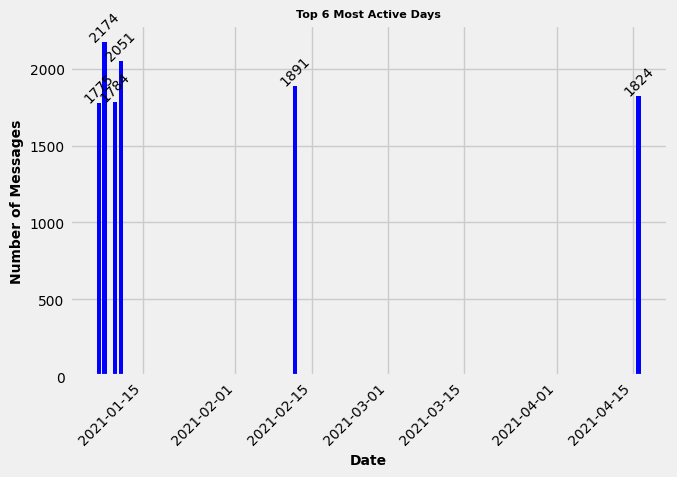

In [ ]:
timeline = df.groupby('only_date').count()['message'].reset_index()

plt.style.use('fivethirtyeight')
plt.figure(figsize=(7,5))

# Plot the data
top_days = timeline.sort_values(by='message', ascending=False).head(6)
plt.bar(top_days['only_date'], top_days['message'], color="blue")

# Add annotations
for index, row in top_days.iterrows():
    plt.text(row['only_date'], row['message'] + 5, str(row['message']), ha='center', fontsize=10,rotation=45)

plt.xlabel('Date', fontweight='bold',fontsize=10)
plt.ylabel('Number of Messages', fontweight='bold', fontsize=10)
plt.title("Top 6 Most Active Days", fontsize=8, fontweight='bold')
plt.xticks(rotation=45,ha='right' , fontsize=10)
plt.yticks(ha='right' , fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()



### Least Active Day

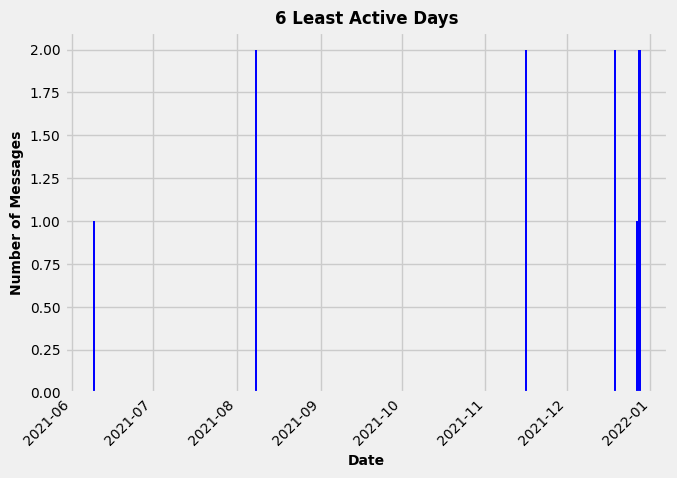

In [ ]:
timeline = df.groupby('only_date').count()['message'].reset_index()

plt.style.use('fivethirtyeight')
plt.figure(figsize=(7,5))

# Plot the data
top_days = timeline.sort_values(by='message', ascending=True).head(6)
plt.bar(top_days['only_date'], top_days['message'], color="blue")


plt.xlabel('Date', fontweight='bold', fontsize=10)
plt.ylabel('Number of Messages', fontweight='bold', fontsize=10)
plt.title("6 Least Active Days", fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)

# Adjust layout to provide more space
plt.tight_layout()

# Show the plot
plt.show()


# Selecting user for further analysis

In [ ]:
print("users :  ", user , "Overall"  )
selected_user = input("select user from the above names OR you can select the whole chat ")
print("you have selected : " , selected_user)

users :   [ Harshad Shah NMIMS,  Saransh Batnagar,  Shireen,  Shreyas Dongre,  Jay Malanker,  Aditya Acharya NMIMS,  Brshank Negi NMIMS,  Aniruddh Kulkarni,  Anjna Gupta,  Nishil Tayal,  Hansin patwa,  Shounak Deshmukh,  Drashti Magia,  Aryan Pasha,  Viraj Patil NMIMS,  Nihaal Raichura,  Mansi Pavaskar NMIMS,  Diya Karia,  Divyata Shah ,  Sahil Patki,  Karan Manikarni,  Aaryan Pasha,  Shaunak Joshi,  Aditya Patankar,  Devesh Pawar NMIMS,  Suvaditya Mukherjee,  Aryan Malviya,  Aaryadev Chandra NMIMS,  Yaashie Sabla,  Krisha Chemburkar,  Raksheet Jain,  sohamsinghal,  Dev Chandan NMIMS,  Disha Reddy ,  Vishesh Mehta,  Maitri Shah NMIMS,  Gautam Padhi,  Prisha ,  ‪+91 88799 93048‬, group_notification,  Raj Thakar ,  Raed ,  Abhinav Rastogi,  Aayan ,  Vishan Oberoi,  Ratnam Zanwar,  Dharmik Shetty,  nubair kalsekar,  ‪+91 99877 44228‬,  Manan Shah,  Shrusthi,  Ekta Mistry,  Rohit Raval,  Priyanka Kitur NMIMS,  Shwetha Ajay,  Ayush Modi,  Raghav Jeendgar,  Shradha NMIMS,  Sidharth Jariyal N

### **Total Messages Sent in the Group**
### **Overall Word Count in the Group's Communication**
### **Count of Media Messages Shared in the Group**



In [ ]:
# fetch all the messages
messages_group = df["message"]

# fetch the number of messages
num_messages_group = df.shape[0]

# fetch the total number of words
words_group = []
for message in df['message']:
  words_group.extend(message.split())

# fetch number of media messages
num_media_messages_group = df[df['message'] == '<Media omitted>\n'].shape[0]

print("Total Messages Sent in the Group : " , num_messages_group)
print("Overall Word Count in the Group's Communication : " , len(words_group))
print("Count of Media Messages Shared in the Group : " , num_media_messages_group)


Total Messages Sent in the Group :  108895
Overall Word Count in the Group's Communication :  470981
Count of Media Messages Shared in the Group :  0


### **Count of Messages Sent by the User**
### **Total Word Count in Messages Sent by the User**
### **Number of Media Messages Shared by the User**

In [ ]:
if selected_user != 'Overall':
  df_user = df[df['user'] == selected_user]

# fetch all the messages
messages_user = df_user["message"]

# fetch the number of messages
num_messages_user = df_user.shape[0]

# fetch the total number of words
words_user = []
for message in df_user['message']:
  words_user.extend(message.split())

# fetch number of media messages
num_media_messages_user = df_user[df_user['message'] == '<Media omitted>\n'].shape[0]

print("Count of Messages Sent by " ,selected_user ,": " , num_messages_user)
print("Total Word Count in Messages Sent by " ,selected_user ,": " , len(words_user))
print("Number of Media Messages Shared by " ,selected_user ,":" , num_media_messages_user)


Count of Messages Sent by   Brshank Negi NMIMS :  5057
Total Word Count in Messages Sent by   Brshank Negi NMIMS :  16497
Number of Media Messages Shared by   Brshank Negi NMIMS : 0


### **Count of Emojis Used in the Group Chat**

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'
def split_count(text):
    emoji_list_group = []
    data = regex.findall(r'\X',text)

    for word in data:
        emojis_group = emoji.distinct_emoji_list(word)
        if any(char in emojis_group for char in word):
            emoji_list_group.append(word)
    return emoji_list_group

df['emoji'] = df["message"].apply(split_count)

emojis_group = sum(df['emoji'].str.len())
print("Count of Emojis Used in the Group Chat :" ,emojis_group)

Count of Emojis Used in the Group Chat : 157634


### **Count of Emojis Used by the User**

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'
def split_count(text):
    emoji_list_user = []
    data = regex.findall(r'\X',text)

    for word in data:
        emojis_user = emoji.distinct_emoji_list(word)
        if any(char in emojis_user for char in word):
            emoji_list_user.append(word)
    return emoji_list_user

df_user['emoji'] = df_user["message"].apply(split_count)

emojis_user = sum(df_user['emoji'].str.len())
print("Count of Emojis Used by the User" ,selected_user ,":" ,emojis_user)

Count of Emojis Used by the User  Brshank Negi NMIMS : 1531



### **Analysis of Emojis: Frequency of Their Usage in the Group Chat**

In [ ]:
total_emoji_list_group = list([a for b in df.emoji for a in b])
emoji_dict_group = dict(Counter(total_emoji_list_group))
emoji_dict_group = sorted(emoji_dict_group.items() ,key = lambda x : x[1] , reverse = True)
print("Top 20 Most Frequently Used Emojis in the Group Chat by Frequency of Occurrence")
for i, nested_array in enumerate(emoji_dict_group):
    if i < 20:
        print(f" {nested_array}" , end=' ')
    else:
        break

Top 20 Most Frequently Used Emojis in the Group Chat by Frequency of Occurrence
 ('😂', 130802)  ('🥳', 1751)  ('🙏', 1551)  ('😭', 1405)  ('🎉', 1124)  ('✨', 1055)  ('👀', 979)  ('🤣', 902)  ('👍', 711)  ('😳', 669)  ('🥰', 610)  ('🥺', 584)  ('🔥', 529)  ('🥲', 470)  ('🦾', 459)  ('🥵', 423)  ('😴', 356)  ('💯', 342)  ('🤮', 342)  ('🤩', 341) 

### **Emojis and the frequency of the emoji used by the User**

In [ ]:
total_emoji_list_user = list([a for b in df_user.emoji for a in b])
emoji_dict_user = dict(Counter(total_emoji_list_user))
emoji_dict_user = sorted(emoji_dict_user.items() ,key = lambda x : x[1] , reverse = True)
print("Emojis and the frequency of the emoji used by " ,selected_user )
for i, nested_array in enumerate(emoji_dict_user):
    if i < 20:
        print(f" {nested_array}" , end=' ')
    else:
        break

Emojis and the frequency of the emoji used by   Brshank Negi NMIMS
 ('😂', 772)  ('👍', 105)  ('🔥', 81)  ('🙏', 78)  ('🎉', 73)  ('💯', 38)  ('👀', 31)  ('🤣', 26)  ('🥳', 23)  ('😭', 23)  ('👌', 22)  ('🎂', 11)  ('👏', 10)  ('🤩', 9)  ('✅', 9)  ('😆', 9)  ('✨', 9)  ('😎', 9)  ('💛', 8)  ('🧠', 7) 


### **Average Number of Words Used per Message in the Group Chat**

In [ ]:
#Finding Average Words per Message
wordsPerMessage_group = len(words_group)/num_messages_group
wordsPerMessage_group= ("%.3f" % round(wordsPerMessage_group, 2))
print('Average Number of Words Used per Message in the Group Chat  : ', wordsPerMessage_group)

Average Number of Words Used per Message in the Group Chat  :  4.330



### **Average Number of Words Used per Message by Participants in the Group Chat**

In [ ]:
#Finding Average Words per Message
wordsPerMessage_user = len(words_user)/num_messages_user
wordsPerMessage_user= ("%.3f" % round(wordsPerMessage_user, 2))
print('Average Number of Words Used per Message by Participants in the Group Chat' ,selected_user ,': ', wordsPerMessage_user)

Average Number of Words Used per Message by Participants in the Group Chat  Brshank Negi NMIMS :  3.260


### **Word Cloud Representation for the Group**

Wordcloud for the whole group


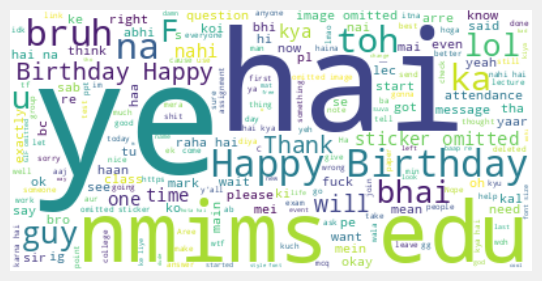

In [ ]:
text = ' '.join(review for review in df.message)
stopwords = set(STOPWORDS)

#Generate a wordcloud image
print('Wordcloud for the whole group')

#Generate a wordcloud Image
wordcloud = WordCloud(stopwords= stopwords , background_color = 'white').generate(text)

#Display the generated image
plt.figure(figsize = (6,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### **Word Cloud Representation for the User**

 WordCloud of  Brshank Negi NMIMS


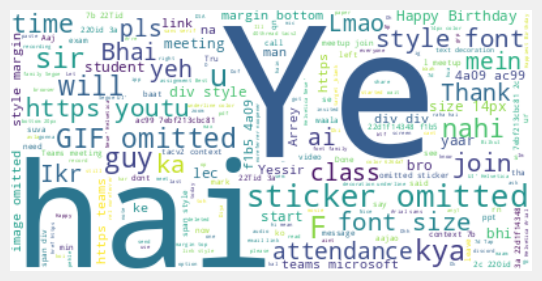

In [ ]:
if selected_user != 'Overall':
  df_user = df[df['user'] == selected_user]

text = ' '.join(review for review in df_user.message)
stopwords = set(STOPWORDS)

#Generate a wordcloud image
print(' WordCloud of' , selected_user)

#Generate a wordcloud Image
wordcloud = WordCloud(stopwords= stopwords , background_color = 'white').generate(text)

#Display the generated image
plt.figure(figsize = (6,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### **Creating a New Dataset for Further Analysis**

In [ ]:
timeline_group = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

time_group  = []
for i in range(timeline_group .shape[0]):
  time_group .append(timeline_group ['month'][i] + "-" + str(timeline_group ['year'][i]))

timeline_group ['time'] = time_group
print("Group database")
timeline_group


Group database


,year,month_num,month,message,time
0,2021,1,January,20490,January-2021
1,2021,2,February,13477,February-2021
2,2021,3,March,19755,March-2021
3,2021,4,April,21638,April-2021
4,2021,5,May,8684,May-2021
5,2021,6,June,417,June-2021
6,2021,7,July,7854,July-2021
7,2021,8,August,7134,August-2021
8,2021,9,September,3163,September-2021
9,2021,10,October,3757,October-2021


In [ ]:
# making a new dataset for further anaylsis
if selected_user != 'Overall':
  df_user = df[df['user'] == selected_user]

timeline_user = df_user.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

time_user = []
for i in range(timeline_user.shape[0]):
  time_user.append(timeline_user['month'][i] + "-" + str(timeline_user['year'][i]))

timeline_user['time'] = time_user
print(selected_user ," database")
timeline_user


 Brshank Negi NMIMS  database


,year,month_num,month,message,time
0,2021,1,January,913,January-2021
1,2021,2,February,844,February-2021
2,2021,3,March,757,March-2021
3,2021,4,April,461,April-2021
4,2021,5,May,367,May-2021
5,2021,6,June,11,June-2021
6,2021,7,July,377,July-2021
7,2021,8,August,472,August-2021
8,2021,9,September,274,September-2021
9,2021,10,October,420,October-2021


### **Count of Daily Messages Sent in the Group**

In [ ]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()
print("Number of message sent in the group on daily basis")
daily_timeline

Number of message sent in the group on daily basis


,only_date,message
0,2021-01-01,518
1,2021-01-02,241
2,2021-01-03,291
3,2021-01-04,1243
4,2021-01-05,641
...,...,...
341,2021-12-27,1
342,2021-12-28,2
343,2021-12-29,10
344,2021-12-30,36



### **Count of Daily Messages Sent by Each User**

In [ ]:
if selected_user != 'Overall':
  df_user = df[df['user'] == selected_user]

daily_timeline_user = df_user.groupby('only_date').count()['message'].reset_index()
print("Number of message sent by" ,selected_user ," on daily basis")
daily_timeline_user

Number of message sent by  Brshank Negi NMIMS  on daily basis


,only_date,message
0,2021-01-01,16
1,2021-01-02,7
2,2021-01-03,14
3,2021-01-04,73
4,2021-01-05,18
...,...,...
269,2021-12-23,6
270,2021-12-24,2
271,2021-12-25,1
272,2021-12-26,3



### **Count of message sent in the group on weekly basis**

In [ ]:
print("Number of message sent in the group on weekly basis")
print(df['day_name'].value_counts())


Number of message sent in the group on weekly basis
Friday       19942
Thursday     17648
Monday       17123
Tuesday      16765
Wednesday    16458
Saturday     13604
Sunday        7355
Name: day_name, dtype: int64



### **Count of message sent by the user on weekly basis**

In [ ]:
if selected_user != 'Overall':
  df_user = df[df['user'] == selected_user]
print("Number of message sent by the user on weekly basis")
print(df_user['day_name'].value_counts())

Number of message sent by the user on weekly basis
Friday       1045
Thursday     1006
Tuesday       895
Monday        715
Wednesday     712
Saturday      467
Sunday        217
Name: day_name, dtype: int64


### **Count of message sent in the group on monthly basis**

In [ ]:
print("Number of message sent in the group on monthly basis")
print(df['month'].value_counts())

Number of message sent in the group on monthly basis
April        21638
January      20490
March        19755
February     13477
May           8684
July          7854
August        7134
October       3757
September     3163
December      1810
November       716
June           417
Name: month, dtype: int64


### **Count of message sent by the user on monthly basis**

In [ ]:
if selected_user != 'Overall':
  df_user = df[df['user'] == selected_user]
print("Number of message sent by the user on monthly basis")
print(df_user['month'].value_counts())

Number of message sent by the user on monthly basis
January      913
February     844
March        757
August       472
April        461
October      420
July         377
May          367
September    274
December     134
November      27
June          11
Name: month, dtype: int64


In [ ]:
#activity_heatmap  group
user_heatmap = df.pivot_table(index='day_name', columns='am,pm', values='message', aggfunc='count').fillna(0)
print("For Group")
user_heatmap

For Group


"am,pm",AM,PM
day_name,,
Friday,8196,11746
Monday,7255,9868
Saturday,6442,7162
Sunday,1578,5777
Thursday,5005,12643
Tuesday,4985,11780
Wednesday,5016,11442


In [ ]:
#activity_heatmap
if selected_user != 'Overall':
  df_user = df[df['user'] == selected_user]

user_heatmap_user = df_user.pivot_table(index='day_name', columns='am,pm', values='message', aggfunc='count').fillna(0)
print("For" , selected_user)
user_heatmap_user

For  Brshank Negi NMIMS


"am,pm",AM,PM
day_name,,
Friday,397,648
Monday,418,297
Saturday,209,258
Sunday,73,144
Thursday,287,719
Tuesday,306,589
Wednesday,227,485


### **more graphical day wise distribution of whole group**

In [ ]:
def f(i):
  l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  return l[i];
day_df=pd.DataFrame(df["message"])
day_df['day_of_date'] = df['date'].dt.weekday
day_df['day_of_date'] = day_df["day_of_date"].apply(f)
day_df["messagecount"] = 1
day = day_df.groupby("day_of_date").sum()
day.reset_index(inplace=True)
fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=False
)
fig.show()

<ipython-input-46-42f6dfb701db>:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



# Sentiment analysis of the whole group

In [ ]:
df_SA = pd.DataFrame(df, columns=["only_date",  'message'])

data = df_SA.dropna()

import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["message"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["message"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["message"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


    only_date                      message  Positive  Negative  Neutral
0  2021-01-01             HAPPY NEW YEAR\n     0.649       0.0    0.351
2  2021-01-01          Happy New year 🎉🎉\n     0.552       0.0    0.448
3  2021-01-01  Happy new year !!!!!!!!🥳\n‎     0.619       0.0    0.381
5  2021-01-01   Happy new year @everyone\n     0.552       0.0    0.448
6  2021-01-01          Happy New Year 🕳️\n     0.552       0.0    0.448


In [ ]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("The sentiment of the whole group  is Positive")
    elif (b>a) and (b>c):
        print("The sentiment of the whole group is Negative")
    else:
        print("The sentiment of the whole group is Neutral")
sentiment_score(x, y, z)

The sentiment of the whole group is Neutral


# Sentiment analysis of the user





In [ ]:
if selected_user != 'Overall':
  df_user = df[df['user'] == selected_user]
df_SA_user = pd.DataFrame(df_user, columns=["only_date",  'message'])

data = df_SA_user.dropna()

import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["message"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["message"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["message"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


     only_date          message  Positive  Negative  Neutral
9   2021-01-01  Ay gaali nahi\n       0.0       0.0      1.0
18  2021-01-01             👌🏼\n       0.0       0.0      1.0
39  2021-01-01           Abso\n       0.0       0.0      1.0
43  2021-01-01            Tru\n       0.0       0.0      1.0
64  2021-01-01         Bilkul\n       0.0       0.0      1.0


In [ ]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("The sentiment of" ,selected_user ," is Positive")
    elif (b>a) and (b>c):
        print("The sentiment of" ,selected_user ," is Negative")
    else:
        print("The sentiment of" ,selected_user ," is Neutral")
sentiment_score(x, y, z)

The sentiment of  Brshank Negi NMIMS  is Neutral
